<a href="https://colab.research.google.com/github/Swetha-Anaparthi/Car_price/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

Part1

In [120]:
df = pd.read_csv(r"/content/car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [121]:
Q1=np.percentile(df["Price"],25,interpolation="midpoint")
Q3=np.percentile(df["Price"],75,interpolation="midpoint")
IQR=Q3-Q1
IQR

12465.53501477145

In [122]:


upper=Q3+1.5*(IQR)
lower=Q1-1.5*(IQR)

In [123]:
upper=np.where(df["Price"]>=(Q3+(1.5*IQR)))
lower=np.where(df["Price"]<=(Q1-(1.5*IQR)))


In [124]:
upper

(array([ 80,  81,  82, 140, 141, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 340, 341]),)

In [125]:

lower

(array([], dtype=int64),)

In [126]:
#Droping Outliers
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

In [21]:
x=df["Mileage"]
y=df["Price"]

In [22]:
model=LinearRegression()

In [23]:
model.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

LinearRegression()

In [24]:
y_hat=model.predict(np.array(x).reshape(-1,1))
y_hat

array([[21795.25214633],
       [21700.40307993],
       [21278.97850811],
       [20952.50677628],
       [20590.33692755],
       [20340.86520368],
       [20305.58218116],
       [20265.31802606],
       [20155.62933549],
       [19812.76137555],
       [21586.04457756],
       [21084.92188429],
       [20922.30865995],
       [20593.65768261],
       [20224.32745579],
       [20182.19537597],
       [20156.97839223],
       [19946.7330875 ],
       [19234.63867434],
       [19051.06318368],
       [21717.52572321],
       [21550.76155504],
       [21157.87472202],
       [20935.2803594 ],
       [20686.22372991],
       [20628.21428996],
       [20428.24257119],
       [20303.50670925],
       [20109.13876465],
       [20028.61045445],
       [21013.42187691],
       [20963.61055101],
       [20765.19543618],
       [20354.77086549],
       [20198.0727361 ],
       [20112.25197252],
       [20032.0349831 ],
       [19869.42175876],
       [19836.52552895],
       [19571.59153932],


In [25]:
r2_score(y,y_hat)

0.009890445234810197

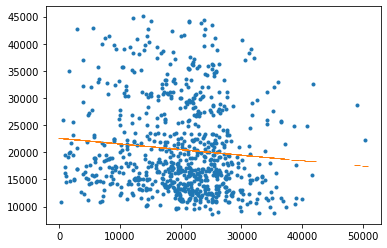

In [26]:
plt.plot(x,y,".")
plt.plot(x,y_hat,"_")

In [27]:
output=pd.DataFrame()
output["y"]=y
output["y_hat"]=y_hat
output

,y,y_hat
0,17314.103129,21795.252146
1,17542.036083,21700.403080
2,16218.847862,21278.978508
3,16336.913140,20952.506776
4,16339.170324,20590.336928
...,...,...
799,16507.070267,20964.233193
800,16175.957604,20666.818068
801,15731.132897,20522.676543
802,15118.893228,19952.440635


Price and Milage did not have strong relation

Part 2

<Figure size 1000x1000 with 0 Axes>

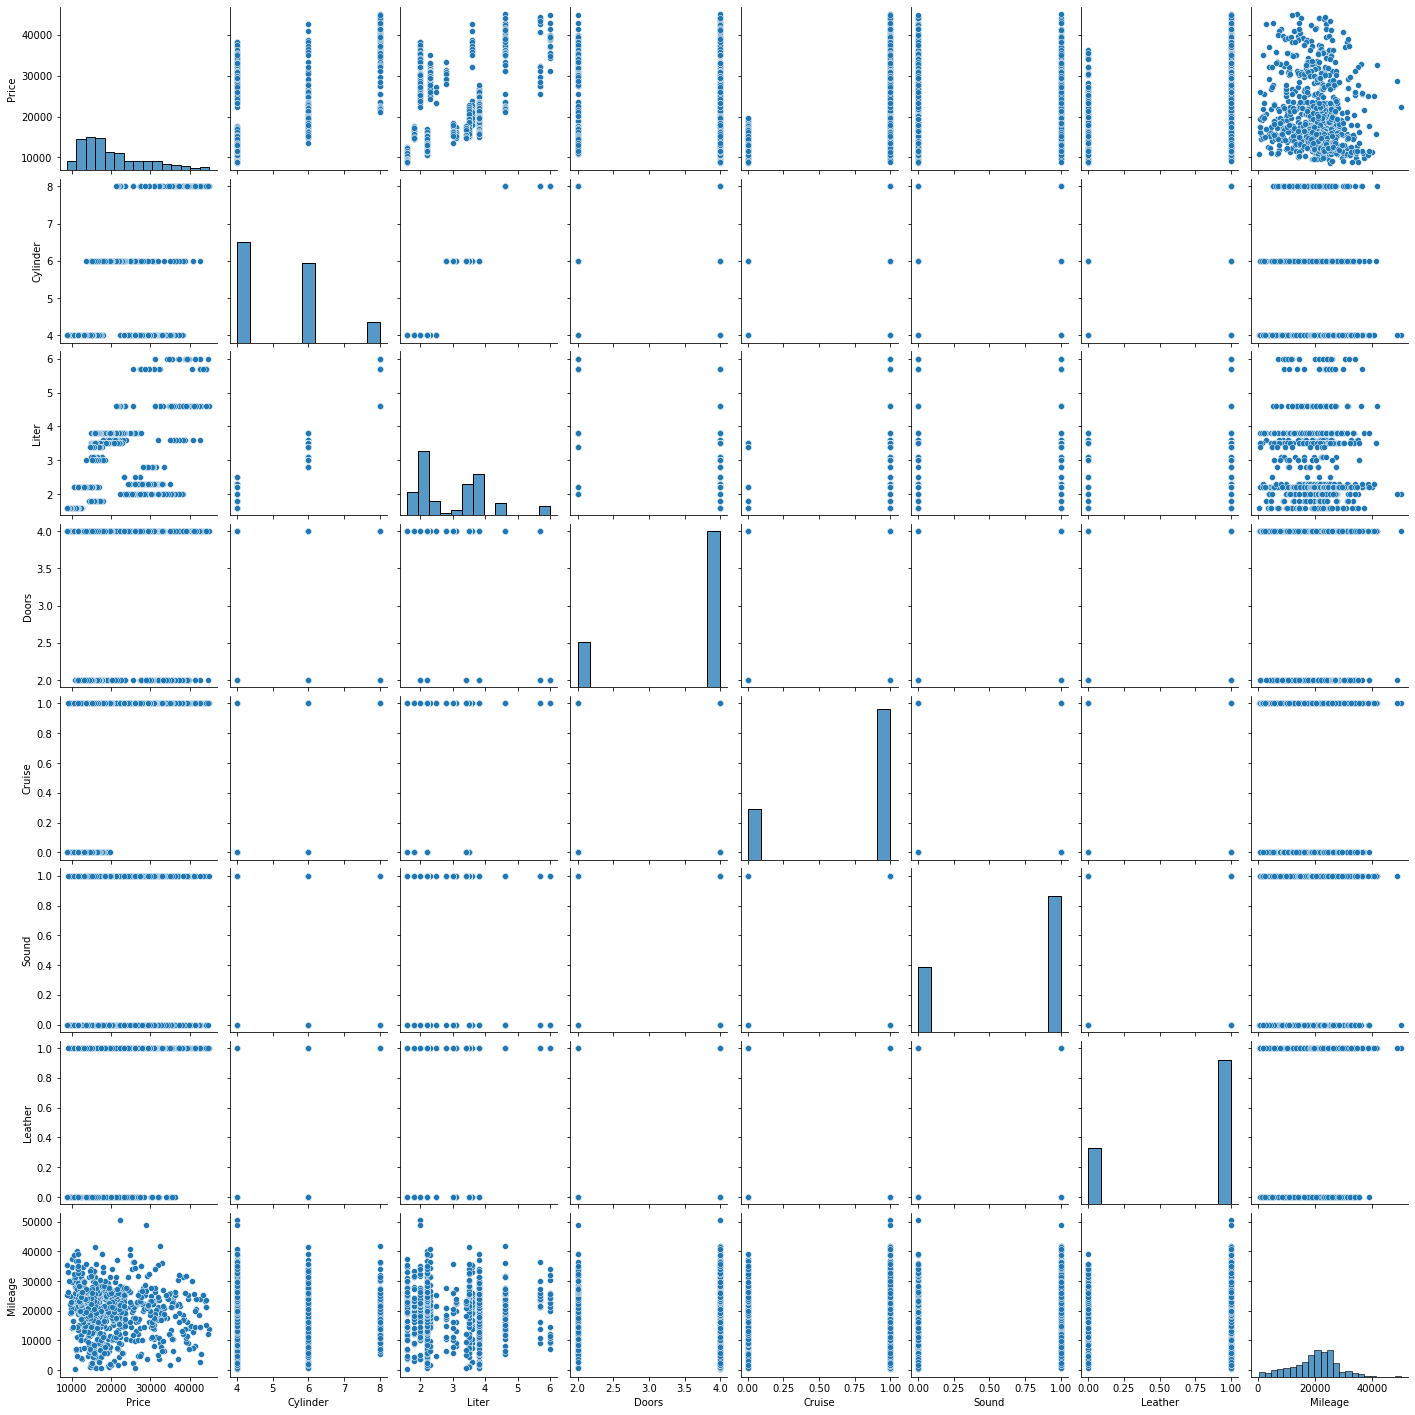

In [48]:
plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(df[["Price","Cylinder","Liter","Doors","Cruise",	"Sound",	"Leather","Mileage"]])

In [49]:
df_corr=df[["Price","Cylinder","Liter","Doors","Cruise",	"Sound",	"Leather","Mileage"]].corr()


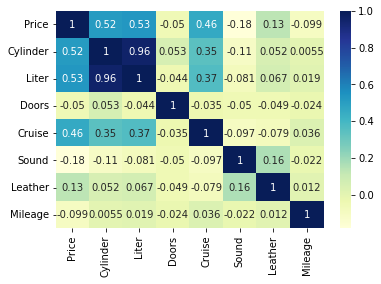

In [50]:
sns.heatmap(df_corr,cmap="YlGnBu",annot=True)

Assumption 1

In [53]:
x=df[["Cylinder","Liter","Cruise"]]
y=df["Price"]

In [55]:
model=LinearRegression()

In [56]:
model.fit(x,y)

LinearRegression()

In [57]:
y_hat=model.predict(x)
y_hat

array([23054.63525983, 23054.63525983, 23054.63525983, 23054.63525983,
       23054.63525983, 23054.63525983, 23054.63525983, 23054.63525983,
       23054.63525983, 23054.63525983, 24104.40812278, 24104.40812278,
       24104.40812278, 24104.40812278, 24104.40812278, 24104.40812278,
       24104.40812278, 24104.40812278, 24104.40812278, 24104.40812278,
       24104.40812278, 24104.40812278, 24104.40812278, 24104.40812278,
       24104.40812278, 24104.40812278, 24104.40812278, 24104.40812278,
       24104.40812278, 24104.40812278, 24524.31726796, 24524.31726796,
       24524.31726796, 24524.31726796, 24524.31726796, 24524.31726796,
       24524.31726796, 24524.31726796, 24524.31726796, 24524.31726796,
       24524.31726796, 24524.31726796, 24524.31726796, 24524.31726796,
       24524.31726796, 24524.31726796, 24524.31726796, 24524.31726796,
       24524.31726796, 24524.31726796, 24524.31726796, 24524.31726796,
       24524.31726796, 24524.31726796, 24524.31726796, 24524.31726796,
      

In [58]:
r2_score(y,y_hat)

0.36493060685592005

Assumption 2

In [59]:
x=df[["Cylinder","Liter"]]
y=df["Price"]
model=LinearRegression()
model.fit(x,y)
pred=model.predict(x)

In [60]:
r2_score(y,pred)

0.28254696391773293

Part 3 hard mode

In [127]:
#Creating dummy for the creation_source column
total_data_dum=pd.get_dummies(df[["Make",	"Model"	,"Trim",	"Type"]])
total_data_dum=total_data_dum.assign(user_id=df["Price"])
total_data_dum

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,user_id
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,17314.103129
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,17542.036083
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,16218.847862
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,16336.913140
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,16339.170324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16507.070267
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16175.957604
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,15731.132897
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,15118.893228


In [117]:
total_data_dum_corr=total_data_dum.corr()
total_data_dum

In [128]:
df2=pd.merge(df,total_data_dum,how="outer",left_on="Price",right_on="user_id")
df2

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,user_id
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,1,0,0,0,0,0,1,0,17314.103129
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,1,0,0,0,0,0,1,0,17542.036083
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,1,0,0,0,0,0,1,0,16218.847862
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,1,0,0,0,0,0,1,0,16336.913140
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,1,0,0,0,0,0,1,0,16339.170324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,16425.174796,14242,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,1,0,16425.174796
795,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,1,0,16175.957604
796,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,1,0,15731.132897
797,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,1,0,15118.893228


In [129]:
df2.drop(["user_id"],axis=1,inplace=True)
df2

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,16425.174796,14242,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
795,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
796,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
797,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0


In [132]:
df2_corr=df2.corr()
df2_corr.to_csv("corr_data.csv")
df2_corr

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.102270,0.519285,0.532090,-0.048367,0.463405,-0.175524,0.132087,0.013380,0.586474,...,-0.138674,-0.147957,0.037782,0.059715,-0.060014,0.380109,-0.158228,-0.218884,0.031005,0.084018
Mileage,-0.102270,1.000000,0.003417,0.016412,-0.028683,0.029898,-0.028312,0.003575,0.018193,-0.001107,...,-0.065812,0.033774,-0.007273,-0.018317,-0.077232,0.057863,-0.005702,-0.027054,-0.018250,0.021832
Cylinder,0.519285,0.003417,1.000000,0.957842,0.056918,0.349625,-0.106010,0.047165,0.199056,0.485518,...,-0.101090,-0.101090,0.131972,0.067182,-0.101090,-0.060020,-0.023949,-0.046817,0.218697,-0.264967
Liter,0.532090,0.016412,0.957842,1.000000,-0.040637,0.372863,-0.078424,0.063321,0.209229,0.359928,...,-0.145631,-0.145631,0.106438,0.085033,-0.124662,-0.030568,0.066211,-0.121709,0.167437,-0.250319
Doors,-0.048367,-0.028683,0.056918,-0.040637,1.000000,-0.025057,-0.040454,-0.049213,0.180520,0.161047,...,0.060927,0.060927,0.259431,0.060927,0.060927,-0.412909,-0.839322,0.155590,0.668470,0.159695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_Convertible,0.380109,0.057863,-0.060020,-0.030568,-0.412909,0.131706,-0.081915,-0.028739,-0.074538,-0.066498,...,-0.025157,-0.025157,-0.116171,-0.025157,-0.025157,1.000000,-0.104332,-0.064245,-0.283637,-0.065940
Type_Coupe,-0.158228,-0.005702,-0.023949,0.066211,-0.839322,-0.038300,0.103566,0.069696,-0.155739,-0.138939,...,-0.052563,-0.052563,-0.242725,-0.052563,-0.052563,-0.104332,1.000000,-0.134231,-0.592623,-0.137772
Type_Hatchback,-0.218884,-0.027054,-0.046817,-0.121709,0.155590,-0.250751,0.070302,0.087058,-0.095900,-0.085555,...,0.391584,-0.032367,-0.149464,-0.032367,-0.032367,-0.064245,-0.134231,1.000000,-0.364922,-0.084837
Type_Sedan,0.031005,-0.018250,0.218697,0.167437,0.668470,0.130113,-0.007351,-0.090978,0.262795,0.234448,...,-0.142897,0.088695,0.409578,0.088695,-0.142897,-0.283637,-0.592623,-0.364922,1.000000,-0.374549


Mark can be one of the factors to predict the price